In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../")

theme = themepy.Theme('paper')

%matplotlib inline

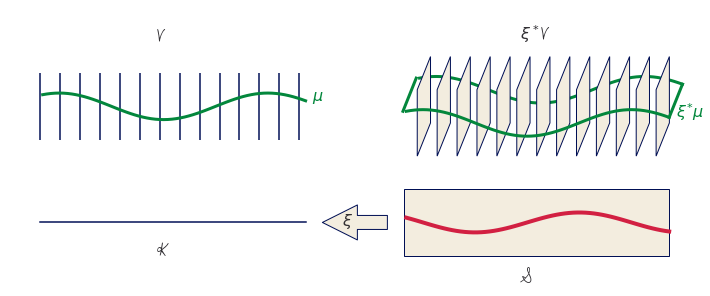

In [4]:
fig, axd  = plt.subplot_mosaic([['k', 's']], figsize=(10,4), 
                                    constrained_layout=True)

facecolor = axd['k'].get_facecolor()
mc = 'C2'

xpos = [.1, .9]
x = np.linspace(-2*np.pi, np.pi*2, 1000)
inds = ((x>xpos[0]) & (x<xpos[-1]))
xin = x[inds]
mu = np.sin(xin*10)*.04 +.5
y = np.cos(xin*10)*.03+.2


axd['k'].vlines(np.arange(xpos[0], xpos[-1],.06), ymin=.45, ymax=.65)
axd['k'].axhline(0.2, xmin=xpos[0], xmax=xpos[-1])
axd['k'].annotate('K', (.45, 0.1), fontsize=16)
axd['k'].plot(xin, mu+.05, mc, linewidth=3, zorder=10)
axd['k'].annotate(r'$\mu$', (xpos[-1]+.02, mu[-1]+.05), fontsize=16, color=mc)
axd['k'].annotate("V", (.45,.75), fontsize=16)
axd['k'].set(aspect='equal', ylim=(0,.85), xlim=[0,1])
b1 = mpatches.Rectangle((xpos[0], 0.1), height=.2, width=(xposl[-1]-xposl[0]), 
                        facecolor=facecolor, edgecolor='C0')
axd['s'].add_patch(b1)
axd['s'].plot(x[inds], y, color='C1', linewidth=4)

for off in np.arange(.04,.78,.06):
    verts = np.array([[.1, .4], [.1,.6], [.14, .7], [.14, .5], [.1, .6 ]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['s'].add_patch(p)
    

axd['s'].plot(xin, mu, mc, linewidth=3)
axd['s'].plot(xin+.04, mu+.1, color=mc, zorder=-2, linewidth=3)
axd['s'].plot([xin[0]-.01, xin[0]+.03], [mu[0], mu[0]+.1], color=mc, linewidth=3)
axd['s'].plot([xin[-1], xin[-1]+.04], [mu[-1], mu[-1]+.1], color=mc, linewidth=3)
axd['s'].annotate(r'$\xi^{*}\mu$', (xpos[-1]+.02, mu[-1]), fontsize=16, color=mc)
axd['s'].annotate(r"$\xi^*$V", (.45,.75), fontsize=16)
axd['s'].annotate('S', (.45,0.02),  fontsize=16)
axd['s'].set(aspect='equal', ylim=(0,.85), xlim=(0,1))
fig.text(.482,.23, r'$\xi$', fontsize=16)
con_ft = mpatches.ConnectionPatch(xyA=(.05,.2), coordsA=axd['s'].transData,
                        xyB=(.95, .2), coordsB=axd['k'].transData,   
                         arrowstyle="simple", mutation_scale=70, 
                        facecolor=facecolor, edgecolor='C0')
fig.add_artist(con_ft)
axd['k'].axis('off')
axd['s'].axis('off')
fig.savefig(spath/"q_hat.png", bbox_inches='tight', facecolor='white')

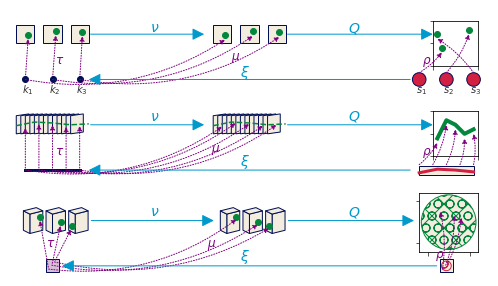

In [63]:
fig, axd = plt.subplot_mosaic([['Es', 'Vs', 'Hs'], 
                               ['El', 'Vl', 'Hl'],
                               ['Ei', 'Vi', 'Hi']], figsize=(10,5), gridspec_kw = {'hspace':0})
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
ac = '#0099CC'
oc = 'C4'
dc='C2'
textsize=12
labelsize=14

yl = .2
xpos = [.2, .5,.8]
s = axd['Es'].scatter(xpos, [yl,yl,yl], zorder=100)
yt = [44, 48, 47]
xt = [32,38, 31]
klabs = [r'$k_{1}$', r'$k_{2}$',r'$k_{3}$' ]
slabs = [r'$s_{1}$', r'$s_{2}$',r'$s_{3}$' ]

axsub = axd['Hs'].inset_axes([.35, .35, .5, .5], facecolor='white')
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(30,40))
axsub.scatter(xt,yt, color=dc, edgecolor=dc)

for i, (off, kl, sl) in enumerate(zip(xpos, klabs, slabs)):
    verts = np.array([[0, .4], [0,.6], [.2, .6], [.2, .4], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['Es'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['Vs'].add_patch(pv)
    xp = (xt[i]/1000)+off
    yp = (yt[i]/100)+.25
    axd['Es'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
    axd['Vs'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
    
    axd['Es'].annotate(kl,(off-.04, yl-.15))
    axd['Hs'].annotate(sl,(off-.04, yl-.15))
        
    c = mpatches.Circle((off,yl), radius=.075, edgecolor='C0', facecolor='C1')
    axd['Hs'].add_patch(c)
   
    
    a1 = mpatches.FancyArrowPatch((off,.2), (xp,yp-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['Es'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,.2), coordsA=axd['Es'].transData,
                      xyB=(xp,yp-.05), coordsB=axd['Vs'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,.2+.075), coordsA=axd['Hs'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['Hs'].transData,
                      xyB=(xpos[-1]+.1, yl), coordsB=axd['Es'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['Es'].transData,
                      xyB=(0, .7), coordsB=axd['Vs'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['Vs'].transData,
                      xyB=(.35, .7), coordsB=axd['Hs'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
#axd['Es'].annotate('temperature', (.1, .83))
#axd['Es'].annotate('pressure', (0.03, .58), rotation=90)

#axd['Vs'].annotate('xpos',  (.1, .83))
#axd['Vs'].annotate('ypos',  (0.03, .65), rotation=90)

#axd['Hs'].annotate('temperature\nxpos', (.35, .865))
#axd['Hs'].annotate('pressure\nypos', (.85, .58), rotation=-90)

axd['Es'].annotate(r'$\tau$',(0.53, 0.37), color=oc, fontsize=textsize)
axd['Vs'].annotate(r'$\mu$', (.3, .42), color=oc, fontsize=textsize)
axd['Hs'].annotate(r'$\rho$', (.23, .37), color=oc, fontsize=textsize)


yl = .2
xpos = [.2, .8]
s = axd['El'].axhline(yl, xmin=xpos[0], xmax=xpos[-1], linewidth=3, zorder=10)
yt = np.array([44, 48, 47, 45, 46])
xt = np.array([1,3,5,7,9])

r = mpatches.Rectangle((xpos[0], .15), height=.1, width=xpos[1]-xpos[0], 
                        facecolor=facecolor, edgecolor='C0') 
axd['Hl'].add_patch(r)
axsub = axd['Hl'].inset_axes([.35, .35, .5, .5], facecolor='white')
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(0,10))
axsub.plot(xt,yt, color=dc, linewidth=4)

xp = (xt/10)
yp = (yt/100)+.25


axd['El'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
axd['Vl'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
axd['Hl'].plot(xp[:-1]+.1, yp[:-1]-.52, color='C1', linewidth=3 )

for i, off in enumerate(np.arange(xpos[0], xpos[-1], .05)):
    verts = np.array([[0, .4], [0,.6], [.14, .62], [.14, .42], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['El'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['Vl'].add_patch(pv)
    


for i, off in enumerate(np.arange(xpos[0], xpos[-1], .15)):
    a1 = mpatches.FancyArrowPatch((off, yl), (off,yp[i]), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['El'].add_patch(a1)
    a2 = mpatches.ConnectionPatch(xyA=(off,yl), coordsA=axd['El'].transData,
                      xyB=(off,yp[i]-.01), coordsB=axd['Vl'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,yl+.06), coordsA=axd['Hl'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['Hl'].transData,
                      xyB=(xpos[-1]+.1, yl), coordsB=axd['El'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['El'].transData,
                      xyB=(0, .7), coordsB=axd['Vl'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['Vl'].transData,
                      xyB=(.35, .7), coordsB=axd['Hl'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)


#axd['El'].annotate('time', (.1, .83))
#axd['El'].annotate('pressure', (0.03, .58), rotation=90)

#axd['Vl'].annotate('xpos',  (.1, .83))
#axd['Vl'].annotate('ypos',  (0.03, .65), rotation=90)

#axd['Hl'].annotate('time\nxpos', (.35, .865))
#axd['Hl'].annotate('pressure\nypos', (.85, .58), rotation=-90)

axd['El'].annotate(r'$\tau$',(0.53, 0.37), color=oc, fontsize=textsize)
axd['Vl'].annotate(r'$\mu$', (.08, .4), color=oc, fontsize=textsize)
axd['Hl'].annotate(r'$\rho$', (.23, .37), color=oc, fontsize=textsize)

axd['Ei'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.2), aspect='equal')
axd['Vi'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.2), aspect='equal')
axd['Hi'].set(xlim=(-.2,1.2), ylim=(-0.2,1.2), aspect='equal')

r = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor='#D8BFD8', edgecolor='C0')
s = axd['Ei'].add_patch(r)

r2 = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor=facecolor, edgecolor='C0')
s = axd['Hi'].add_patch(r2)

smile = mpatches.Circle((.5,0), radius=.075, 
                        facecolor=facecolor, edgecolor='C1', hatch='Ox')
axd['Hi'].add_patch(smile)

axsub = axd['Hi'].inset_axes([.2, .3, .65, .65], facecolor='white')
axsub.set(xticklabels=[], yticklabels=[], ylim=(-0.2,1.2), xlim=(-0.2,1.2))

smileB =  mpatches.Circle((.5,.5), radius=.65, facecolor=facecolor, 
                          edgecolor=dc, hatch='Ox')
axsub.add_patch(smileB)
                          

x = [.3, .63, .80]
y = [.75, .67, .61]
xi = [.44,.49, .53]
yi = np.array([.05, .11, .16])-.1
    
axd['Ei'].scatter(x,y, color=dc, zorder=10)
axd['Vi'].scatter(x,y, color=dc, zorder=10)

#axd['Ei'].text(.025,.87, 'column', rotation=10, fontsize=12)
#axd['Ei'].text(-.01,.62, 'row', rotation=90, fontsize=12)
#axd['Ei'].text(-.06,.39, 'value', rotation=-30, fontsize=12)

#axd['Vi'].text(.025,.87, 'xpos', rotation=10, fontsize=12)
#axd['Vi'].text(-.01,.62, 'ypos', rotation=90, fontsize=12)
#axd['Vi'].text(-.06,.39, 'color', rotation=-30, fontsize=12)
for i, off in enumerate([-.05, .3, .65]):

    verts = np.array([[[.2,.4], [.2,.7], [.4, .75], [.4,.45]],
                 [[.1,.75],[.1,.45],[.2,.4],[.2,.7]],
                 [[.1, .75], [.3, .8],[.4, .75], [.2,.7]]])+[off, +.1]
 
    pe = mcollections.PolyCollection(verts, edgecolor='C0', facecolor=facecolor )
    axd['Ei'].add_collection(pe)

    pv = mcollections.PolyCollection(verts, edgecolor='C0', facecolor=facecolor )
    axd['Vi'].add_collection(pv)

    a1 = mpatches.FancyArrowPatch((xi[i], yi[i]), (x[i],y[i]-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['Ei'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['Ei'].transData,
                      xyB=(x[i],y[i]-.03), coordsB=axd['Vi'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['Hi'].transData,
                      xyB=(x[i],y[i]), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    

axd['Ei'].annotate(r'$\tau$',(0.4, 0.30), color=oc, fontsize=textsize)
axd['Vi'].annotate(r'$\mu$', (-.15, .3), color=oc, fontsize=textsize)
axd['Hi'].annotate(r'$\rho$', (.33, .13), color=oc, zorder=10, fontsize=textsize)

a3 = mpatches.ConnectionPatch(xyA=(0.35, 0), coordsA=axd['Hi'].transData,
                      xyB=(.65, 0), coordsB=axd['Ei'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)

a4 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['Ei'].transData,
                      xyB=(-.05, .7), coordsB=axd['Vi'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
a5 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['Vi'].transData,
                      xyB=(0, .7), coordsB=axd['Hi'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)

for off in [0, .265, .255*2 ]:
    fig.text(.5, .175+off, r'$\xi$', color=ac, fontsize=labelsize)
    fig.text(.375,.3+off, r'$\nu$', color=ac, fontsize=labelsize)
    fig.text(.65, .3+off, r'$Q$', color=ac, fontsize=labelsize)
fig.subplots_adjust(hspace=-.25)
fig.savefig(spath/"teaser.png", facecolor='white', bbox_inches='tight')

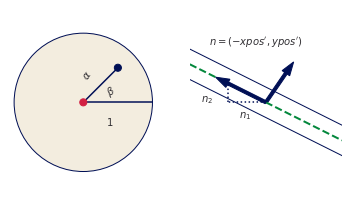

In [72]:
fig, axd = plt.subplot_mosaic([['scatter', 'line']])
sc = mpatches.Circle((.5,.5), radius=.3, edgecolor='C0', facecolor=facecolor)
axd['scatter'].add_patch(sc)
axd['scatter'].annotate(r"$S_i$", (.44,0.05), fontsize=16)
axd['scatter'].annotate(r'$s=(\alpha, \beta)$', (.33, .87))
axd['scatter'].plot([.5, .8], [.5, .5], color='C0')
axd['scatter'].plot([.5,.65], [.5, .65], color='C0')
axd['scatter'].scatter([.5, .65], [.5, .65], c=['C1','C0'], s=50, zorder=100)
axd['scatter'].annotate(r'$\alpha$', (.49, .60), rotation=55)
axd['scatter'].annotate(r'$\beta$', (.59, .53), rotation=30)
axd['scatter'].annotate(r'$1$', (.6, .4))

axd['line'].set(ylim=(46.5,48.5), xlim=(4, 6), aspect='equal')
axd['line'].plot(xt[1:3]+1, yt[1:3], color=dc, linewidth=2, linestyle='--' )
axd['line'].plot(xt[1:3]+1, yt[1:3]-.2, color='C0', linewidth=1)
axd['line'].plot(xt[1:3]+1, yt[1:3]+.2, color='C0', linewidth=1)
axd['line'].arrow(5.0, 47.5, np.cos(45)*.5, np.sin(45)*.45, width=.04, color='C0')
axd['line'].arrow(5.0, 47.5, -.5, .25, zorder=10, width=.04, color='C0')
axd['line'].plot([5, 5-.5], [47.5, 47.5], linestyle=':', color='C0')
axd['line'].plot([5-.5, 5.-.5], [47.5, 47.5+.25], linestyle=':', color='C0')
axd['line'].annotate(r'$n_1$', (4.65, 47.3), fontweight='black')
axd['line'].annotate(r'$n_2$', (4.15, 47.5), fontweight='black')
axd['line'].annotate(r'$n=(-xpos^{\prime}, ypos^{\prime})$', (4.25, 48.25))
for ax in axd.values():
    ax.set_aspect('equal')
    ax.axis('off')
fig.savefig(spath/"base_q.png", facecolor='white', bbox_inches='tight')